# Minimisation d'une fonctionnelle

On veut déterminer le minimum local d'une fonction à plusieurs variables.
On traite d'aborder le cas sans contrainte.

La fonctionnelle à minimiser dans cet exemple est :
$f(x_0, x_1) = (x_0 - 1)^2 + (x_1 - 2)^2$


     fun: 0.0
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 3
     nit: 1
    njev: 3
  status: 0
 success: True
       x: array([1., 2.])


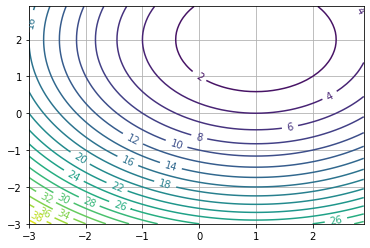

In [3]:
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize

def f(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

#calcul du gradient
def Gf(x):
    return 2*(x[0] - 1), 2*(x[1] - 2)

delta =0.1
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z=(X-1)**2+(Y-2)**2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 21)
ax.clabel(CS, CS.levels, inline=True)
ax.grid()

#i
res = optimize.minimize(fun=f, jac=Gf, x0=(2, 0), method='CG')
print(res)
 
#res = optimize.minimize(f, (2, 0), method='CG')
#print(res)

plt.show()

     fun: 0.5
     jac: array([ 1., -1.])
 message: 'Optimization terminated successfully'
    nfev: 4
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([1.5, 1.5])


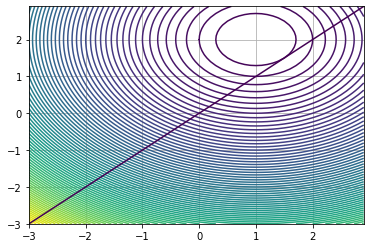

In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize

def f(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

#jac is a callable returning the gradient of the objective
def Gf(x):
    return 2*(x[0] - 1), 2*(x[1] - 2)

#cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
#        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
#        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})

delta =0.1
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z=(X-1)**2+(Y-2)**2

Zcontr=X-Y


plt.figure()
CS = plt.contour(X, Y, Z, 101)                        # add 11 contour lines
CS = plt.contour(X, Y, Zcons1, [0])       
plt.grid()

cons = ({'type': 'eq',   'fun': lambda x:  x[0] - x[1]})

#Bounds for variables (only for L-BFGS-B, TNC and SLSQP).
bnds = ((0, None), (0, None))

# Constraints definition (only for COBYLA and SLSQP). Each constraint is defined in a dictionary 
res = optimize.minimize(fun=f, jac=Gf, x0=(2, 0), method='SLSQP', bounds=bnds, constraints=cons)
print(res)
 
#res = optimize.minimize(f, (2, 0), method='CG')
#print(res)

plt.show()

In [31]:
help(plt.contour)

Help on function contour in module matplotlib.pyplot:

contour(*args, **kwargs)
    Plot contours.
    
    :func:`~matplotlib.pyplot.contour` and
    :func:`~matplotlib.pyplot.contourf` draw contour lines and
    filled contours, respectively.  Except as noted, function
    signatures and return values are the same for both versions.
    
    :func:`~matplotlib.pyplot.contourf` differs from the MATLAB
    version in that it does not draw the polygon edges.
    To draw edges, add line contours with
    calls to :func:`~matplotlib.pyplot.contour`.
    
    
    Call signatures::
    
      contour(Z)
    
    make a contour plot of an array *Z*. The level values are chosen
    automatically.
    
    ::
    
      contour(X,Y,Z)
    
    *X*, *Y* specify the (x, y) coordinates of the surface
    
    ::
    
      contour(Z,N)
      contour(X,Y,Z,N)
    
    contour up to *N* automatically-chosen levels.
    
    ::
    
      contour(Z,V)
      contour(X,Y,Z,V)
    
    draw contour li

In [5]:
help(optimize.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be specified 
    using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, o

In [8]:
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize

def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def df(x):
    return np.array([x[0], 5*x[1]])

def ddf(x):
    return np.array([
                     [1,0],
                     [0,5]
                     ])

x0=np.array([1, 1])
root = optimize.newton(f, x0, fprime=df, args=(), maxiter=200, fprime2=ddf)



IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed